<a href="https://colab.research.google.com/github/EduHdzVillasana/Proyecto_ML_BEDU/blob/main/Proyecto_ML_BEDU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto BEDU Machine Learning
**Integrantes**
* Eduardo Alán Hernández Villasana
* Cristopher Arvizu Cano
* José Antonio Aguilar Téllez

## Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
import os

warnings.simplefilter(action='ignore', category=FutureWarning)

## Carga del Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#df = pd.read_csv('/content/drive/MyDrive/Datos Análisis del Crimen en Chicago/Crimes_2001-2021_clean.csv', index_col=0, )
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BEDU/Datos Análisis del Crimen en Chicago/Crimes_2001-2021_clean.csv', index_col=0, )

### Limpieza de datos y casting de fechas

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,2018-02-10 15:50:01,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,2018-02-10 15:50:01,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,2018-02-10 15:50:01,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,2018-02-10 15:50:01,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,2015-09-05 10:55:00,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,2018-02-10 15:50:01,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [5]:
# No existen los Distritos policiales 21 y 31. 

df = df[df["District"] != 21.0]
df = df[df["District"] != 31.0]

In [6]:
# Algunos delitos registrados salen del área de Chicago

df= df[df["Latitude"] > 41]

In [7]:
# Casting de datos booleanos
df['Arrest'] = df['Arrest'].apply(lambda x: 1 if x == True else 0)
df['Domestic'] = df['Domestic'].apply(lambda x: 1 if x == True else 0)

In [8]:
df['Date'] = pd.to_datetime(df.Date)

In [9]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Obtención de serie de tiempo

In [10]:
df["Total"] = 1

In [11]:
df["Day"] = df["Date"].apply(lambda d: d.date())

In [12]:
df[["Date","Day"]].head()

,Date,Day
0,2015-09-05 13:30:00,2015-09-05
1,2015-09-04 11:30:00,2015-09-04
3,2015-09-05 12:45:00,2015-09-05
4,2015-09-05 13:00:00,2015-09-05
5,2015-09-05 10:55:00,2015-09-05


In [13]:
df_grouped_day = df.groupby("Day")["Total"].sum()

In [14]:
df_grouped_day = pd.DataFrame({"Date":df_grouped_day.index,"Total_Crimes":df_grouped_day.values})
df_grouped_day

,Date,Total_Crimes
0,2001-01-01,274
1,2001-01-02,10
2,2001-01-03,4
3,2001-01-05,6
4,2001-01-06,6
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

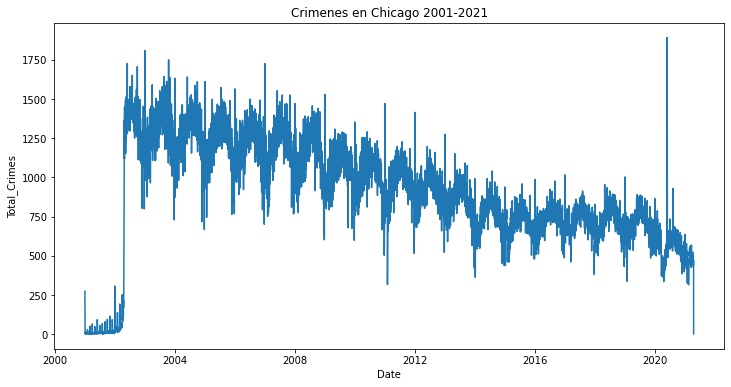

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=df_grouped_day["Date"], y=df_grouped_day["Total_Crimes"], ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

In [16]:
df_grouped_day[460:480]

,Date,Total_Crimes
460,2002-04-09,123
461,2002-04-10,128
462,2002-04-11,136
463,2002-04-12,126
464,2002-04-13,97
465,2002-04-14,119
466,2002-04-15,217
467,2002-04-16,168
468,2002-04-17,170
469,2002-04-18,198


Se observó que a finales de abril del 2002 los crímenes aumentaron muy rapido, esto se debió probablemente a que los datos no estaban recopilados correctamente, y en esas fechas se mejoró el método de recopilación. Se eliminarán los datos de antes del 25 de abril del 2002.

In [17]:
df_grouped_day = df_grouped_day[df_grouped_day["Date"] >= dt.date(2002,4,25)]
df_grouped_day

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

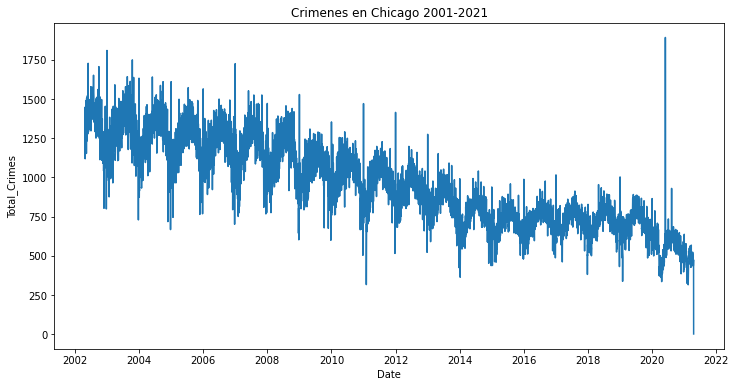

In [18]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
sns.lineplot(x=df_grouped_day["Date"], y=df_grouped_day["Total_Crimes"], ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")

In [19]:
df_grouped_day.to_csv("crime_time_series.csv")

In [20]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

In [21]:
X,Y = transformarSerieADataset(df_grouped_day["Total_Crimes"].to_numpy(), 3)

In [22]:
X[:10]

array([[1294, 1367, 1254],
       [1367, 1254, 1119],
       [1254, 1119, 1447],
       [1119, 1447, 1322],
       [1447, 1322, 1450],
       [1322, 1450, 1244],
       [1450, 1244, 1296],
       [1244, 1296, 1283],
       [1296, 1283, 1254],
       [1283, 1254, 1234]])

In [23]:
Y[:10]

array([1119, 1447, 1322, 1450, 1244, 1296, 1283, 1254, 1234, 1278])

## Separación en Distritos

In [22]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Total                            int64
Day                             object
dtype: object

In [23]:
df["District"] = df["District"].apply(lambda x: int(x))

In [24]:
districts = df["District"].unique()
districts = sorted(districts)

In [25]:
districts

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25]

In [26]:
dates = df_grouped_day["Date"]

In [27]:
dates

476     2002-04-25
477     2002-04-26
478     2002-04-27
479     2002-04-28
480     2002-04-29
           ...    
7405    2021-04-14
7406    2021-04-15
7407    2021-04-16
7408    2021-04-17
7409    2021-04-18
Name: Date, Length: 6934, dtype: object

In [29]:
dict_districts = {}
for district in districts:
  dict_districts[f"District {district}"] = []

In [78]:
df_grouped_day

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


In [89]:
prueba = df.groupby(["Day", "District"])["Total"].sum()

In [92]:
prueba.transpose()

Day         District
2001-01-01  1            8
            2           11
            3            9
            4           13
            5           15
                        ..
2021-04-17  20           8
            22          20
            24          10
            25          28
2021-04-18  4            1
Name: Total, Length: 156942, dtype: int64

In [80]:
df[df["District"] == 1].groupby("Day")["Total"].sum()

Day
2001-01-01     8
2001-01-05     1
2001-01-10     1
2001-01-16     1
2001-01-30     1
              ..
2021-04-13    17
2021-04-14     9
2021-04-15    15
2021-04-16    20
2021-04-17    18
Name: Total, Length: 7111, dtype: int64

In [86]:
df_list = []
for district in districts:
  tmp = df[df["District"] == district].groupby("Day")["Total"].sum()
  df_tmp = pd.DataFrame({"Date": tmp.index, f"District {district}": tmp.values})
  df_list.append(df_tmp)

In [87]:
len(df_list)

22

In [94]:
df_districts = df_grouped_day.copy()

In [96]:
df_districts.dtypes

Date            object
Total_Crimes     int64
dtype: object

In [101]:
df_districts

,Date,Total_Crimes
476,2002-04-25,1294
477,2002-04-26,1367
478,2002-04-27,1254
479,2002-04-28,1119
480,2002-04-29,1447
...,...,...
7405,2021-04-14,434
7406,2021-04-15,443
7407,2021-04-16,458
7408,2021-04-17,474


In [100]:
pd.merge(df_districts, df_list[0], how = "left", on = "Date")

,Date,Total_Crimes,District 1
0,2002-04-25,1294,48.0
1,2002-04-26,1367,68.0
2,2002-04-27,1254,32.0
3,2002-04-28,1119,30.0
4,2002-04-29,1447,91.0
...,...,...,...
6929,2021-04-14,434,9.0
6930,2021-04-15,443,15.0
6931,2021-04-16,458,20.0
6932,2021-04-17,474,18.0


In [102]:
for data in df_list:
  df_districts = pd.merge(df_districts, data, how = "left", on = "Date")

In [105]:
df_districts = df_districts.fillna(0)

In [106]:
df_districts.sample(3)

,Date,Total_Crimes,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12,District 14,District 15,District 16,District 17,District 18,District 19,District 20,District 22,District 24,District 25
265,2003-01-15,1202,41.0,64.0,76.0,73,48.0,62.0,56.0,80.0,65.0,61.0,63.0,67.0,38.0,50.0,47.0,44.0,49.0,58.0,20.0,47.0,28.0,65.0
6578,2020-04-28,452,12.0,16.0,25.0,37,23.0,29.0,29.0,32.0,24.0,27.0,40.0,25.0,10.0,19.0,11.0,16.0,6.0,13.0,8.0,18.0,11.0,21.0
5344,2016-12-11,509,34.0,16.0,27.0,28,30.0,30.0,21.0,40.0,26.0,35.0,28.0,16.0,20.0,24.0,15.0,7.0,32.0,15.0,6.0,14.0,15.0,30.0


In [107]:
df_districts.to_csv("crimes_by_districts.csv")

##Prophet

In [59]:
file_url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crime_time_series.csv"

In [60]:
ts_crime = pd.read_csv(file_url).drop(columns = ["Unnamed: 0"])
ts_crime = ts_crime[:-1]
ts_crime.head(10)

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
5,2002-04-30,1322
6,2002-05-01,1450
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283


In [61]:
ts_crime.tail(10)

,Date,Total_Crimes
6923,2021-04-08,442
6924,2021-04-09,489
6925,2021-04-10,483
6926,2021-04-11,443
6927,2021-04-12,484
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458
6932,2021-04-17,474


In [62]:
ts_crime['Date'] = pd.to_datetime(ts_crime.Date)

In [63]:
# Tenemos una data frame de cada fecha en que se cometio un crimen en Chicago
# dese 2002 a 2021
df_pr = ts_crime.copy()
df_pr

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [64]:
# Prophet necesita un formato muy epscifico para utilizar su libreria
# Asi que nombraremos las fechas con Date = "ds" y Total_Crimenes = "y"
df_pr.columns = ['ds', 'y']
df_pr

,ds,y
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [65]:
train_data_pr = df_pr[:len(ts_crime)-100]

In [66]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=100)
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6928,2021-04-13,575.382052,444.688765,666.531579,575.004134,575.898922,-19.382060,-19.382060,-19.382060,-0.065312,-0.065312,-0.065312,-19.316749,-19.316749,-19.316749,0.0,0.0,0.0,555.999991
6929,2021-04-14,575.259605,449.990349,678.353547,574.871479,575.787899,-11.096843,-11.096843,-11.096843,6.903962,6.903962,6.903962,-18.000806,-18.000806,-18.000806,0.0,0.0,0.0,564.162762
6930,2021-04-15,575.137158,450.095802,669.294995,574.735433,575.676876,-20.009341,-20.009341,-20.009341,-3.460758,-3.460758,-3.460758,-16.548584,-16.548584,-16.548584,0.0,0.0,0.0,555.127817
6931,2021-04-16,575.014712,499.761483,729.918538,574.601999,575.565853,36.543434,36.543434,36.543434,51.512577,51.512577,51.512577,-14.969142,-14.969142,-14.969142,0.0,0.0,0.0,611.558146
6932,2021-04-17,574.892265,448.932033,672.133719,574.458699,575.460417,-10.634557,-10.634557,-10.634557,2.639238,2.639238,2.639238,-13.273796,-13.273796,-13.273796,0.0,0.0,0.0,564.257708


In [67]:
test_data = prophet_pred[["ds", "yhat"]][-100:]
test_data

,ds,yhat
6833,2021-01-08,539.788182
6834,2021-01-09,492.513785
6835,2021-01-10,445.831530
6836,2021-01-11,480.378049
6837,2021-01-12,493.291764
...,...,...
6928,2021-04-13,555.999991
6929,2021-04-14,564.162762
6930,2021-04-15,555.127817
6931,2021-04-16,611.558146


In [69]:
test_data = prophet_pred[["ds", "yhat"]]
test_data["Real"] = ts_crime["Total_Crimes"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



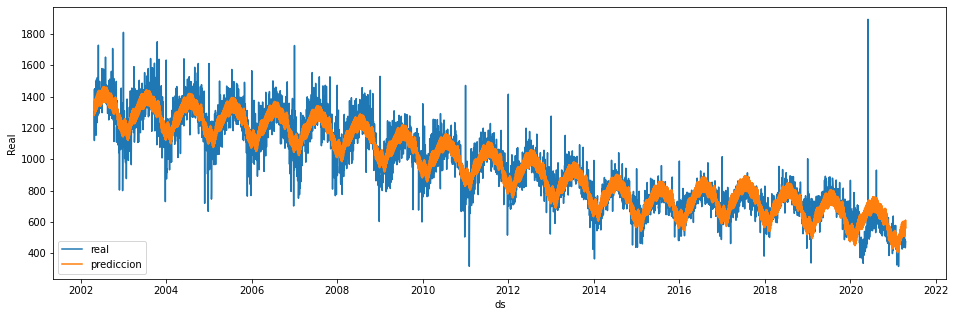

In [70]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data['ds'], y=test_data["Real"], label = "real")
sns.lineplot(x=test_data['ds'], y = test_data["yhat"], label= "prediccion");

## Entrenamiento de modelo por cada distrito

In [32]:
# Importamos Prophet
from fbprophet import Prophet

In [30]:
url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crimes_by_districts.csv"
df_districts = pd.read_csv(url, index_col=0)

In [31]:
df_districts.sample(5)

,Date,Total_Crimes,District 1,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12,District 14,District 15,District 16,District 17,District 18,District 19,District 20,District 22,District 24,District 25
1398,2006-02-21,1031,30.0,57.0,53.0,54,47.0,59.0,67.0,76.0,50.0,41.0,57.0,41.0,57.0,37.0,35.0,24.0,34.0,54.0,30.0,31.0,27.0,70.0
5036,2016-02-07,614,29.0,24.0,28.0,33,25.0,30.0,30.0,38.0,32.0,26.0,49.0,28.0,31.0,24.0,24.0,21.0,37.0,26.0,11.0,22.0,19.0,27.0
4809,2015-06-25,771,29.0,29.0,39.0,57,38.0,52.0,52.0,46.0,32.0,29.0,80.0,37.0,17.0,42.0,28.0,10.0,29.0,36.0,11.0,29.0,19.0,30.0
4894,2015-09-18,761,35.0,41.0,32.0,55,38.0,45.0,39.0,41.0,45.0,35.0,53.0,31.0,30.0,35.0,18.0,22.0,38.0,39.0,15.0,17.0,13.0,44.0
5700,2017-12-02,742,50.0,33.0,39.0,36,31.0,54.0,28.0,39.0,29.0,42.0,45.0,37.0,24.0,25.0,27.0,20.0,59.0,28.0,10.0,16.0,29.0,41.0


In [38]:
def get_metrics (real, prediction, label = ""):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  MSE = (mean_squared_error(real, prediction))
  r2 = (r2_score(real, prediction))
  print(label +" MSE = "+str(MSE) + " r^2 = "+str(r2))

In [58]:
predictions_dict = {}
models_by_district = {}
for district in districts:
  district_string = f"District {district}"
  df_tmp = df_districts[["Date",district_string]].copy()
  df_tmp.columns = ['ds', 'y']
  model = Prophet();
  model.fit(df_tmp)
  models_by_district[district_string] = model
  future = model.make_future_dataframe(periods = 100)
  prediction = model.predict(future)
  prediction = prediction[["ds","yhat"]]
  predictions_dict[district_string] = prediction["yhat"][-100:]
  get_metrics(df_tmp["y"], prediction["yhat"][:-100], district_string)
  predictions_dict["Date"] = prediction["ds"]
  

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 1 MSE = 82.38468270560837 r^2 = 0.47075407051018237


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 2 MSE = 72.89431938836422 r^2 = 0.7487736731324428


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 3 MSE = 72.38293518098352 r^2 = 0.7344055530917084
District 4 MSE = 86.93468595854317 r^2 = 0.7032851732907541


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 5 MSE = 63.722582385487726 r^2 = 0.66347793215521


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 6 MSE = 85.57254597575515 r^2 = 0.6568800236591888


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 7 MSE = 96.85635795914881 r^2 = 0.7611552789282959


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 8 MSE = 103.3802586643919 r^2 = 0.7828192032735638


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 9 MSE = 70.44584515912781 r^2 = 0.7578205416064194


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 10 MSE = 64.8303047086591 r^2 = 0.5686079646822246


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 11 MSE = 153.34704126184906 r^2 = 0.5484377404931537
District 12 MSE = 73.8465264609867 r^2 = 0.7044288891578541


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 14 MSE = 55.835759340213265 r^2 = 0.7327155942977185


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 15 MSE = 105.37161777194011 r^2 = 0.5795716626719775


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 16 MSE = 44.07846115373398 r^2 = 0.5742892128273562


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 17 MSE = 36.52964078186977 r^2 = 0.6076954700313704


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 18 MSE = 80.79208065199471 r^2 = 0.5901386346580104


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 19 MSE = 73.19618549561947 r^2 = 0.6599999835635757


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 20 MSE = 21.09238424556251 r^2 = 0.5211987101205685


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 22 MSE = 44.796768531783854 r^2 = 0.6350453728611716


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


District 24 MSE = 37.702837787341494 r^2 = 0.6463714272901413
District 25 MSE = 84.5326355750513 r^2 = 0.7505193677474984



|Distrito |MSE |$r^2$ |
|---------|----|------|
| District 1| 82.38 | 0.47|
| District 2| 72.89 | 0.74|
| District 3| 72.38 | 0.73|
| District 4| 86.93 | 0.70|
| District 5| 63.72 | 0.66|
| District 6| 85.57 | 0.65|
| District 7| 96.85 | 0.76|
| District 8| 103.38 | 0.78|
| District 9| 70.44 | 0.75|
| District 10| 64.83 | 0.56|
| District 11| 153.34 | 0.54|
| District 12| 73.84 | 0.70|
| District 14| 55.83 | 0.73|
| District 15| 105.37 | 0.57|
| District 16| 44.07 | 0.57|
| District 17| 36.52 | 0.60|
| District 18| 80.79 | 0.59|
| District 19| 73.19 | 0.65|
| District 20| 21.09 | 0.52|
| District 22| 44.79 | 0.63|
| District 24| 37.70 | 0.64|
| District 25| 84.53 | 0.75|

In [ ]:
real = predictions_df[:-100].copy()
predictions_df = predictions_df[-100:]

In [43]:
predictions_df = pd.DataFrame(predictions_dict)
predictions_df["Date"] = pd.to_datetime(predictions_df.Date)
predictions_df

,District 1,Date,District 2,District 3,District 4,District 5,District 6,District 7,District 8,District 9,District 10,District 11,District 12,District 14,District 15,District 16,District 17,District 18,District 19,District 20,District 22,District 24,District 25
6934,18.910364,2021-04-19,25.596999,31.079584,32.859363,28.830553,39.372808,31.835393,34.338502,23.288536,26.752598,38.331101,24.257470,14.812822,22.750593,19.366890,15.617319,16.755465,20.660821,10.985226,19.118013,18.295258,28.604875
6935,20.553363,2021-04-20,26.585258,31.762654,33.771702,28.870860,40.431176,33.599824,33.847435,23.778793,27.146427,43.200979,25.224541,14.861530,24.087060,19.237609,15.435001,16.874580,19.899961,11.066721,19.541104,17.841880,28.687659
6936,20.606484,2021-04-21,26.866922,31.449258,34.456836,29.438194,40.698115,33.838352,34.682544,24.072779,27.279232,43.980788,25.622119,15.469633,24.374323,19.479927,15.226587,18.654935,20.724115,11.248711,20.120632,18.127848,28.834906
6937,20.481543,2021-04-22,25.849661,30.777223,33.672193,29.063282,39.250950,32.605998,34.070697,23.884175,26.938858,43.463020,25.510490,15.524508,23.896764,19.361512,14.918441,19.365700,21.184909,11.080561,19.627073,17.610601,28.771769
6938,23.481127,2021-04-23,27.190496,32.555330,35.802809,30.200775,42.022001,35.136949,37.840579,27.060461,29.863420,44.472818,29.685979,18.746413,25.591551,21.827830,16.590324,25.891306,25.199236,12.002418,21.405688,19.160130,31.961274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,29.139802,2021-07-23,31.962828,37.706231,41.016213,33.030718,45.467293,41.317116,41.745256,31.580421,32.679949,47.410601,35.972419,24.883834,28.257800,24.410967,18.004706,31.457978,32.752753,13.117335,24.261561,22.973234,35.394797
7030,22.466965,2021-07-24,28.090314,34.271145,36.399523,30.647152,42.439161,38.285073,38.284391,30.223163,32.210932,44.111449,31.990226,25.334964,26.358909,22.196040,15.982342,35.283672,34.199214,11.525112,20.491061,21.573118,33.156050
7031,16.922561,2021-07-25,25.903340,32.761972,35.089510,29.613233,39.659834,36.436094,36.160386,29.338587,31.181919,38.655676,29.180120,23.081160,23.962239,21.353145,15.355816,28.761074,30.684971,10.712413,19.817880,20.631120,31.786994
7032,25.357248,2021-07-26,30.785111,36.342343,38.499307,32.028795,43.224268,38.468587,38.681411,28.378114,29.849063,41.210076,30.560657,21.200516,24.883110,22.034096,17.256919,23.016782,28.690679,12.142254,22.647205,22.301139,32.451509


In [52]:
districts_samples = [11,9,7,2]

In [47]:
df_districts["Date"] = pd.to_datetime(df_districts.Date)

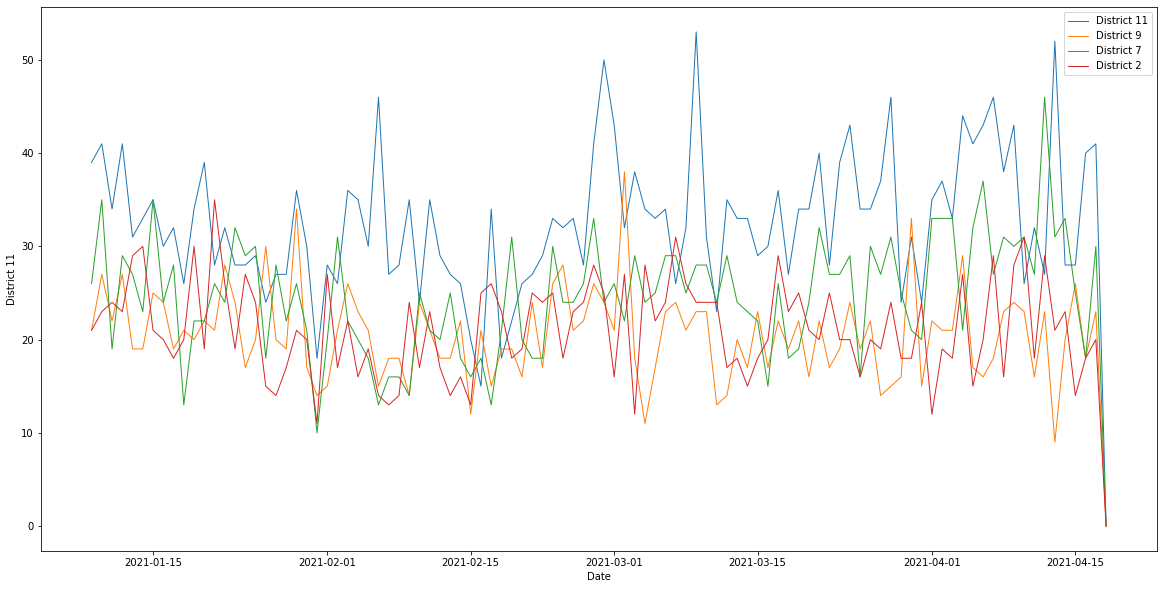

In [53]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
for district in districts_samples:
  district_string = f"District {district}"
  sns.lineplot(x = df_districts["Date"][-100:], y= df_districts[district_string][-100:], linewidth = 1, label = district_string ,ax = ax);

Text(0, 0.5, 'Crimenes')

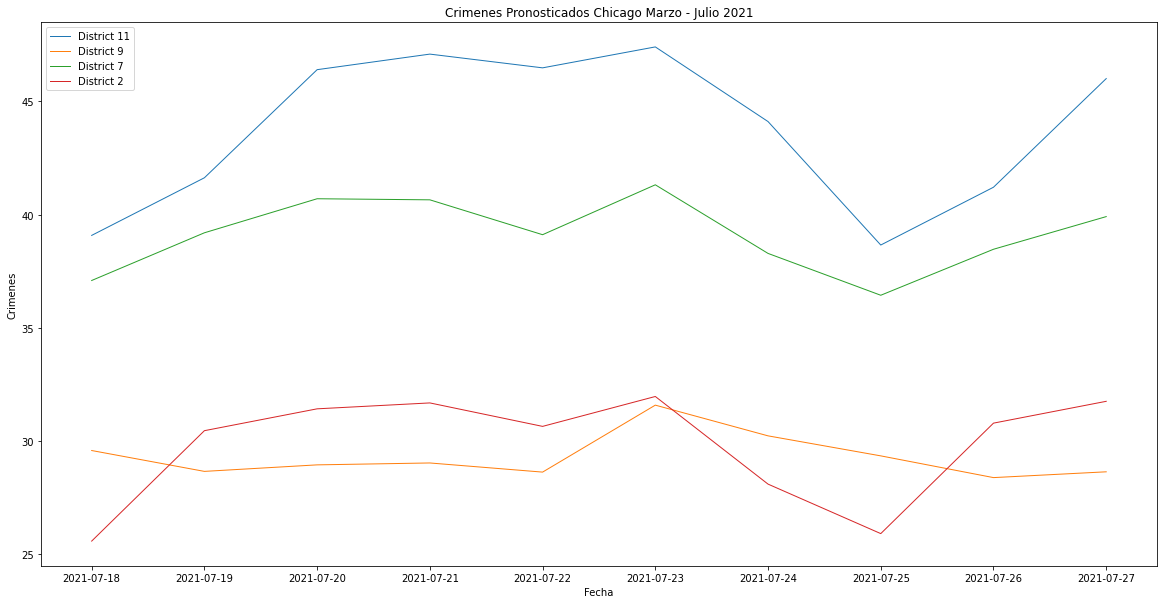

In [57]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
for district in districts_samples:
  district_string = f"District {district}"
  sns.lineplot(x = predictions_df["Date"][-10:], y= predictions_df[district_string][-10:], linewidth = 1, label = district_string ,ax = ax)
ax.set_title("Crimenes Pronosticados Chicago Marzo - Julio 2021")
ax.set_xlabel("Fecha")
ax.set_ylabel("Crimenes")